<a href="https://colab.research.google.com/github/AndreLovo/Analise-de-dados/blob/master/Raspagem_Wikipedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><u>Estudo de Análise: Dados da Copa do Mundo</u></center> 
<center>Com base na página sobre a Copa do Mundo na Wikipedia vamos obter os dados de público pagane em cada final.</center>

<b>Site</b>: https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <center><u>Processo de desenvolvimento</u></center>
<p><b>1.Objetivos</b>: Minerar dados e gerar relatório referente...</p>
<p><b>2.Análise Exploratória</b>: O que mostra a tabela? Quais e quantas tuplas/colunas existem...</p>
<p><b>3.Tratar as tabelas</b>: Tratar o arquivo e fazer as limpezas das tabelas</p>
<p><b>4.Verificação dos dados</b>: Verificação de valores nulos ou errados. Ex.: Nan.</p>
<p><b>5.Tipos</b>: Verificação dos tipos de dados. Ex. Date, int, float, string, object...</p>
<p><b>6.Análise Técnica dos Dados</b>:  ...</p>
<p><b>7.Mostrar Gráficos</b>: ...</p>

In [2]:
# Importando as bibliotecas
import pandas as pd
import requests
    
# URL
url = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'

# Requisitar a página e guardar a resposta
resposta = requests.get(url)

#Obter a resposta em formato HTML
table = pd.read_html(resposta.text)

#Vamos dar uma olhada no resultado
table

[                                   Copa do Mundo FIFA  \
 0                                                 NaN   
 1                                        Dados gerais   
 2                                         Organização   
 3                                             Edições   
 4                                    Local de disputa   
 5                                             Sistema   
 6   Dados históricos  Primeiro vencedor Uruguai (1...   
 7                                    Dados históricos   
 8                                   Primeiro vencedor   
 9                                     Último vencedor   
 10                                     Maior vencedor   
 11  Estatísticas  Total de gol(o)s 2 548  Total de...   
 12                                       Estatísticas   
 13                                   Total de gol(o)s   
 14                                     Total de jogos   
 15                                              Média   
 16           

In [3]:
#Queremos apenas a tabela com os pagantes por final
# Essa é a 12 tabela no site dos dados retornados

#Então o DataFrame será apenas a tabela 12 mas a posição é a 11 pois iniciamos a 
#contar por zero
df = table[11]

df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68.346
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
4,V,1954,Estádio Wankdorf,Berna,62.500


In [4]:
#Vamos mudar o nome das colunas usando a primeira linha
#df.columns = df.iloc[0]
# Mostrar as 5 primeiras linhas da tabela
df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68.346
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
4,V,1954,Estádio Wankdorf,Berna,62.500


In [5]:
#Apagando a primeira linha neste arquivo
#df.drop(df.index[0], inplace=True)
# Mostrar as 5 primeiras linhas da tabela
df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68.346
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
4,V,1954,Estádio Wankdorf,Berna,62.500


In [6]:
# Vamos analisar os tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edição           21 non-null     object 
 1   Ano              21 non-null     int64  
 2   Estádio          21 non-null     object 
 3   Local            21 non-null     object 
 4   Público pagante  21 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 968.0+ bytes


In [7]:
# Precisamos converter a coluna público pagante para inteiro - int
#df['Público pagante'] = df['Público pagante'].str.replace('.','').astype(int)

In [8]:
#Vamos verificar se deu certo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edição           21 non-null     object 
 1   Ano              21 non-null     int64  
 2   Estádio          21 non-null     object 
 3   Local            21 non-null     object 
 4   Público pagante  21 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 968.0+ bytes


In [9]:
# Vamos construir um gráfico com a evolução do Público Pagante

# importando uma nova biblioteca para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Configurando o matplotlib
%matplotlib inline

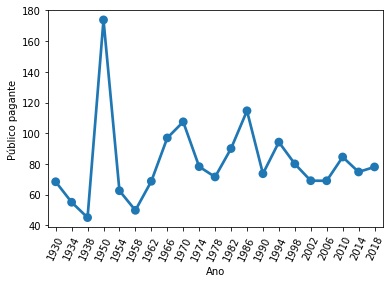

In [10]:
# Exibir o gráfico de linhas com marcação em cada ponto

sns.pointplot(x='Ano',y='Público pagante', data=df)

#Ajustando as Legendas (Deixando os anos tombados)
plt.xticks(rotation=65)
plt.show()